<a href="https://colab.research.google.com/github/snehathth/Resources/blob/master/Sample_Algorithms/KMeans_Clustering_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### K-Means Algorithm to group Wine 

[Dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/) 

This notebook illustrates a simple implementation of the K-Means Clustering on the wine quality dataset, to categorize wine into red and white wine, based on its chemical composition and quality 

In [1]:
# Importing necessary library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the file and describing the data
df_r = pd.read_csv('/content/winequality-red.csv', sep=';')
df_w = pd.read_csv('/content/winequality-white.csv', sep=';')

In [3]:
df_r['wine_type'] = 'red'
df_w['wine_type'] = 'white'

In [4]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  wine_type             1599 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [5]:
df_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  wine_type             4898 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 497.6+ KB


### Data Description 

There are no missing data here. Hence we do not have to perform any data cleansing. 

Since there are about 5000 white wine and only 1500 red wine, we will restrict the white wine to randomly choose 1500

In [6]:
df = df_w.sample(n = 1500)
df = df.append(df_r)
df.reset_index(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3099 entries, 0 to 3098
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 3099 non-null   int64  
 1   fixed acidity         3099 non-null   float64
 2   volatile acidity      3099 non-null   float64
 3   citric acid           3099 non-null   float64
 4   residual sugar        3099 non-null   float64
 5   chlorides             3099 non-null   float64
 6   free sulfur dioxide   3099 non-null   float64
 7   total sulfur dioxide  3099 non-null   float64
 8   density               3099 non-null   float64
 9   pH                    3099 non-null   float64
 10  sulphates             3099 non-null   float64
 11  alcohol               3099 non-null   float64
 12  quality               3099 non-null   int64  
 13  wine_type             3099 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 339.1+ KB


In [8]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['wine_type'] = labelencoder.fit_transform(df['wine_type'])

### Implementing Clustering Algorithm 



In [9]:
# Importing libraries from sklearn 

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [10]:
# Note that it is important to standarize the features before applying K-Means Clustering 
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df.iloc[ : , :13]) 
# Assigning the scaled data to X
X = scaled_df
Y = df.iloc[ : , 13]

In [11]:
# Instantiate a K-Means model with K= 2
# Fitting the model and making initial predictions to visualize
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)
predictions = kmeans.fit_predict(X)

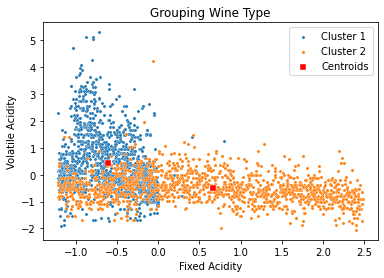

In [12]:
# Visualising the clusters
sns.scatterplot(x=X[predictions == 0, 0], y=X[predictions == 0, 1], palette="deep", label = 'Cluster 1',s=10)
sns.scatterplot(x=X[predictions == 1, 0], y=X[predictions == 1, 1], palette="deep", label = 'Cluster 2',s=10)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=30,marker=',')
plt.grid(False)
plt.title('Grouping Wine Type')
plt.xlabel('Fixed Acidity')
plt.ylabel('Volatile Acidity')
plt.legend()
plt.show()

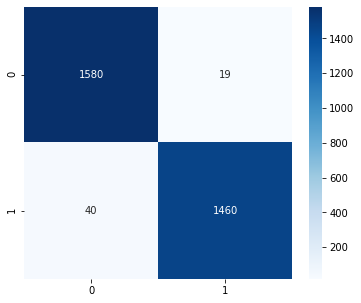

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize = (6,5))
sns.heatmap(confusion_matrix(Y.to_numpy().astype("int"), predictions), annot=True, fmt='g', cmap='Blues')

### Conclusion 

Thus the algorithm was able to group different types of wine based on the wine quality and content. The Algorithm predicted 1580 out of 1599 red wines correctly and 1460 out of 1500 white wines. This gives about ~98% precision. This can be used as the baseline model to improve the clustering algorithm 